# Dimensionality reduction - Python - linear discriminant analysis

In [1]:
import multiprocessing

num_cpu = multiprocessing.cpu_count()
num_cpu

16

In [2]:
import pandas as pd

dataset = pd.read_csv('data/wine.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.7,0.62,1.71,660,3
1,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.1,0.91,3.33,985,1
2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510,2
3,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.4,0.91,2.05,550,3
4,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.7,0.86,3.02,312,2


In [3]:
X = dataset.iloc[:, 0:13].values
X[:5, :]

array([[1.416e+01, 2.510e+00, 2.480e+00, 2.000e+01, 9.100e+01, 1.680e+00,
        7.000e-01, 4.400e-01, 1.240e+00, 9.700e+00, 6.200e-01, 1.710e+00,
        6.600e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, 1.600e+01, 1.010e+02, 3.100e+00,
        3.390e+00, 2.100e-01, 2.140e+00, 6.100e+00, 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.225e+01, 1.730e+00, 2.120e+00, 1.900e+01, 8.000e+01, 1.650e+00,
        2.030e+00, 3.700e-01, 1.630e+00, 3.400e+00, 1.000e+00, 3.170e+00,
        5.100e+02],
       [1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
        8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.222e+01, 1.290e+00, 1.940e+00, 1.900e+01, 9.200e+01, 2.360e+00,
        2.040e+00, 3.900e-01, 2.080e+00, 2.700e+00, 8.600e-01, 3.020e+00,
        3.120e+02]])

In [4]:
y = dataset.iloc[:, 13].values
y[:5]

array([3, 1, 2, 3, 2])

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X[:5, :]

array([[ 1.43214399e+00,  1.55880718e-01,  4.14819587e-01,
         1.51660791e-01, -6.13775045e-01, -9.85613939e-01,
        -1.33454251e+00,  6.29685856e-01, -6.14804353e-01,
         2.00795098e+00, -1.48050498e+00, -1.27357906e+00,
        -2.76711037e-01],
       [ 1.11097510e+00, -5.89179693e-01, -9.01103141e-01,
        -1.04947918e+00,  8.83583612e-02,  1.28969686e+00,
         1.36612798e+00, -1.22360954e+00,  9.62071365e-01,
         4.50699042e-01, -2.08176757e-01,  1.01457831e+00,
         7.58249428e-01],
       [-9.27212090e-01, -5.44296535e-01, -9.01103141e-01,
        -1.48624201e-01, -1.38612179e+00, -1.03368389e+00,
         7.33234123e-04,  6.56394314e-02,  6.85084581e-02,
        -7.17239912e-01,  1.86683727e-01,  7.88587455e-01,
        -7.54385098e-01],
       [ 7.65100912e-01,  2.34617879e+00, -6.03747319e-02,
         1.51660791e-01, -5.43561704e-01, -4.72867844e-01,
        -1.23414583e+00,  8.71420038e-01, -1.00026286e+00,
        -2.84669929e-01, -2.08176757e

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Applying LDA after feature scaling and before fitting the training set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA tries to separate the classes the most, in theory, it should give better result than PDA most of the time
lda = LDA(n_components = 2)

In [8]:
# we need to provide y_train because lda is a supervised model so the labels are needed
X_train = lda.fit_transform(X_train, y_train)
X_train[:5, :]

array([[ 0.25535804, -3.09872824],
       [-1.17097283, -2.15615513],
       [ 3.6611794 ,  1.94852097],
       [ 3.49519303,  0.76311202],
       [-1.7220026 , -1.94622184]])

In [9]:
X_test = lda.transform(X_test)
X_test[:5, :]

array([[ 5.50443576,  2.54914921],
       [ 5.05180315,  2.06759952],
       [-2.85122388,  1.1310054 ],
       [ 4.08804478,  0.77266719],
       [-5.46994721, -2.5524477 ]])

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:5]

array([3, 3, 1, 3, 1])

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 1, 13,  1],
       [ 0,  0,  8]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


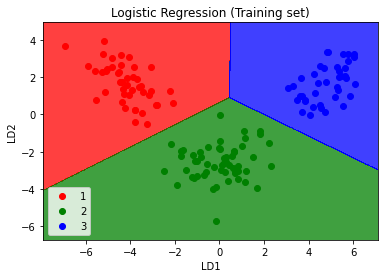

In [13]:
%matplotlib inline

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


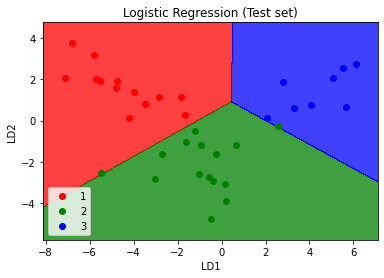

In [14]:
%matplotlib inline

# Visualising the Test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()